# 1 - Initialisation

- Import all modules

In [134]:
import pandas as pd
import missingno as ms
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

- Load Data Set (CSV)

In [135]:
df = pd.read_csv("bank-full.csv")

- Clear Data Set

In [136]:
df['default'] = df['default'].map( 
                   {'yes':1 ,'no':0}) 
df['housing'] = df['housing'].map( 
                   {'yes':1 ,'no':0}) 
df['loan'] = df['loan'].map( 
                   {'yes':1 ,'no':0}) 
df['Target'] = df['Target'].map( 
                   {'yes':1 ,'no':0}) 

#df = df.drop(['contact','day','month','campaign',"pdays", "previous", "poutcome"], axis=1)
df = df.drop(['contact','day','month','poutcome', 'pdays', 'duration'], axis=1)


df[['job', 'marital', 'education']] = df[['job', 'marital', 'education']].apply(lambda x: pd.factorize(x)[0])


In [137]:
df

,age,job,marital,education,default,balance,housing,loan,campaign,previous,Target
0,58,0,0,0,0,2143,1,0,1,0,0
1,44,1,1,1,0,29,1,0,1,0,0
2,33,2,0,1,0,2,1,1,1,0,0
3,47,3,0,2,0,1506,1,0,1,0,0
4,33,4,1,2,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,0,0,3,0,1
45207,71,5,2,3,0,1729,0,0,2,0,1
45208,72,5,0,1,0,5715,0,0,5,3,1
45209,57,3,0,1,0,668,0,0,4,0,0


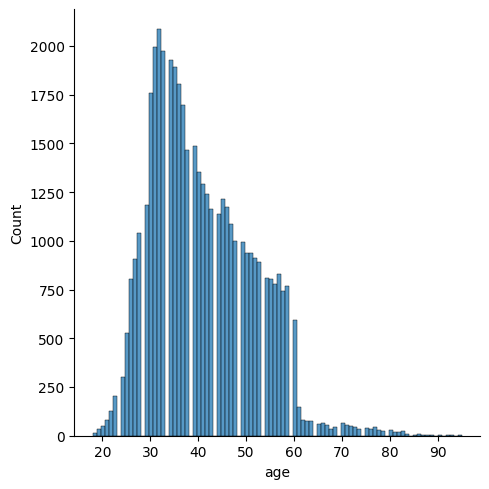

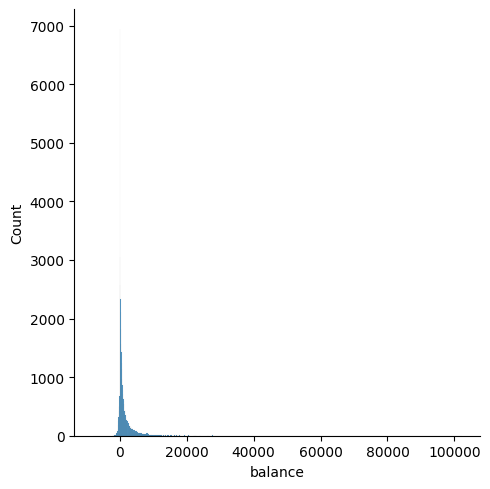

In [138]:
sb.displot(df["age"])
plt.show()

sb.displot(df["balance"])
plt.show()

## On corrige 

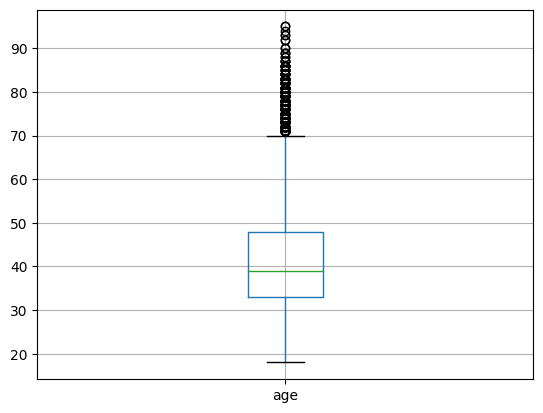

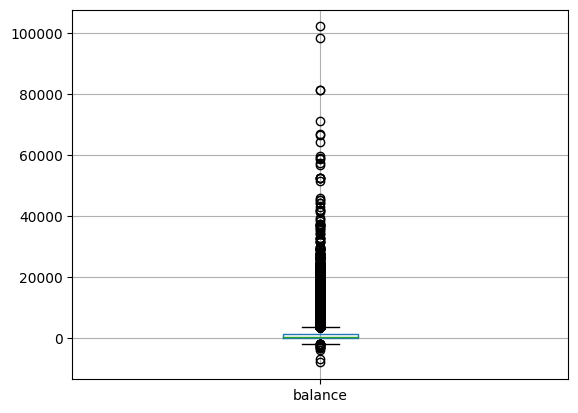

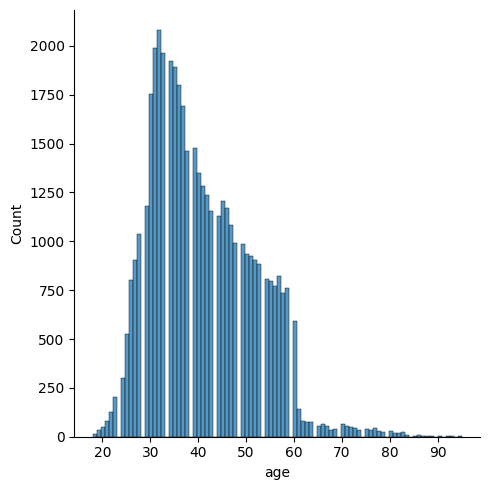

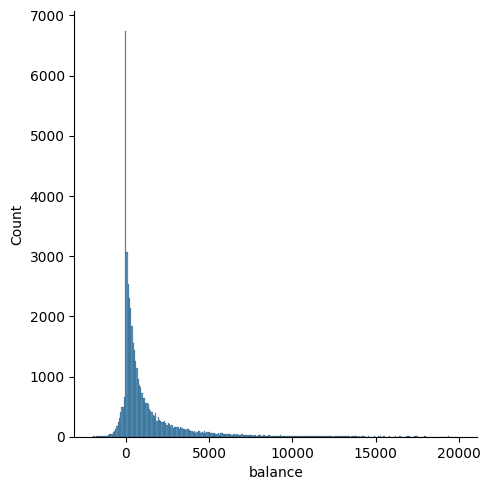

In [139]:
df[["age"]].boxplot()
plt.show()

df[["balance"]].boxplot()
plt.show()

df = df[(df.age >= 17) & (df.age <= 70)]
df = df[(df.balance >= -2000) & (df.balance <= 20000)]


sb.displot(dfClear["age"])
plt.show()

sb.displot(dfClear["balance"])
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\Remy\\AppData\\Roaming\\Python\\Python310\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 640x480 with 0 Axes>

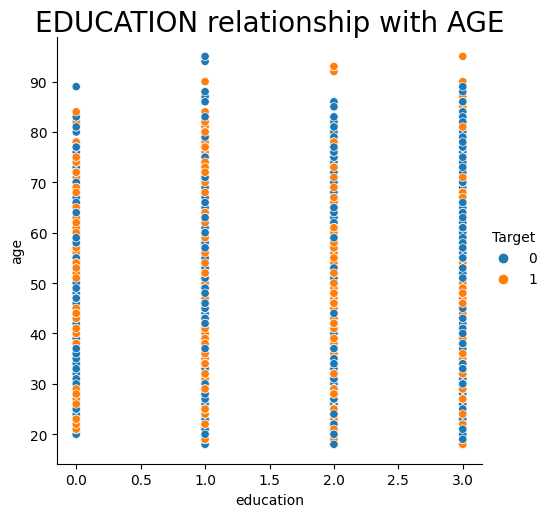

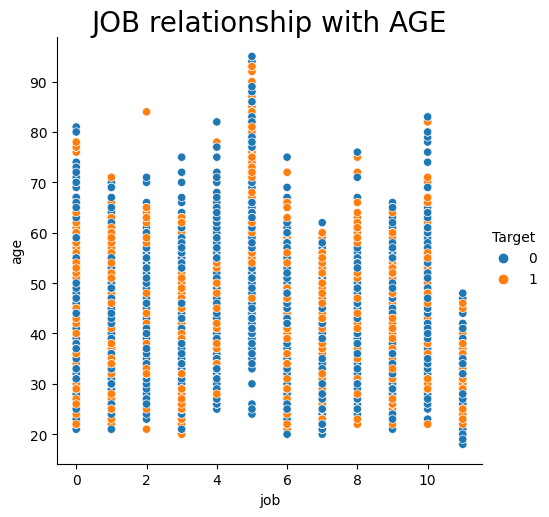

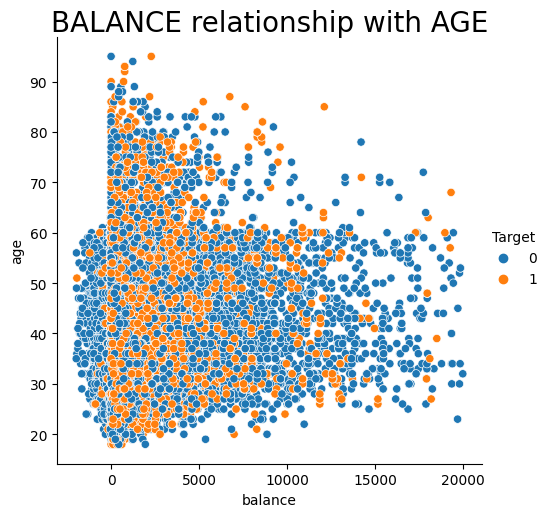

In [140]:
plt.figure()
def corrDiagram(widths,height, df, plt=plt):
    for width in widths: 
        diagram = sb.relplot(y=height , x=width, hue="Target", data=df)
        plt.title(width.upper() + ' relationship with '+ height.upper(), fontsize = 20, color = 'black', verticalalignment= 'top')
    return plt


corrDiagram(["education", "job", "balance"], "age", dfClear)

## Predictive Model

### Gradient Boosting Classifier

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8905 entries, 44959 to 28937
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        8905 non-null   int64
 1   balance    8905 non-null   int64
 2   education  8905 non-null   int64
 3   job        8905 non-null   int64
 4   Target     8905 non-null   int64
dtypes: int64(5)
memory usage: 417.4 KB


<module 'matplotlib.pyplot' from 'C:\\Users\\Remy\\AppData\\Roaming\\Python\\Python310\\site-packages\\matplotlib\\pyplot.py'>

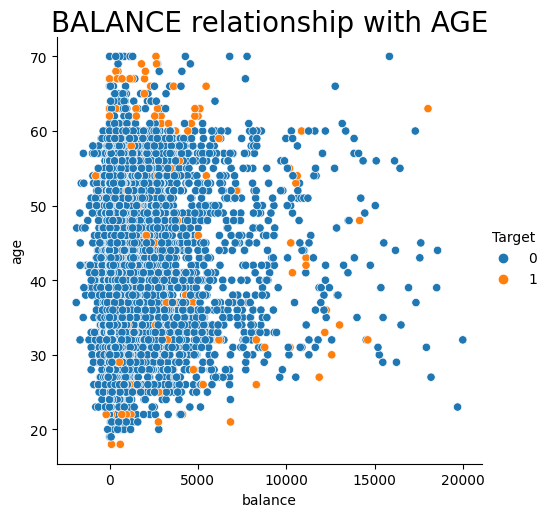

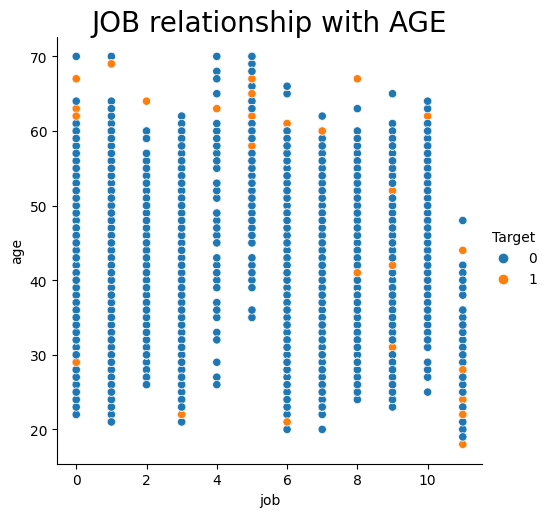

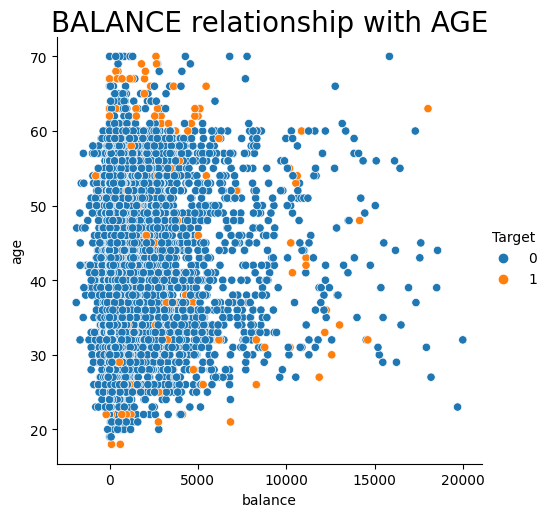

In [141]:
train, test = train_test_split(df, test_size=0.2)

X_train = pd.get_dummies(train.drop(['Target'], axis=1), drop_first=True)
X_test = pd.get_dummies(test.drop(['Target'], axis=1), drop_first=True)

Y_train = train['Target']

model = GradientBoostingClassifier(learning_rate=0.5)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

predictions_df = pd.DataFrame({'age': test["age"],'balance': test["balance"], 'education': test["education"],'job': test["job"],'Target' : predictions})
predictions_df.info()
corrDiagram(["balance", "job", "balance"], "age", predictions_df)

### NAIVE BAYES 

In [142]:
X_train, X_test, y_train, y_test = train_test_split(df, test_size=0.5, random_state=0)
gnb = GaussianNB()
Y_pred = gnb.fit(X_train, y_train).predict(X_test)
Y_pred

ValueError: not enough values to unpack (expected 4, got 2)